In [ ]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Dataset collected from things speak of 1500+ samples (4 hours of data)
data = pd.read_csv('/content/drive/MyDrive/WeatherDataset/feeds.csv')

In [ ]:
# Preprocess the timestamp feature
data['created_at'] = pd.to_datetime(data['created_at'])
data['year'] = data['created_at'].dt.year
data['month'] = data['created_at'].dt.month
data['day'] = data['created_at'].dt.day
data['hour'] = data['created_at'].dt.hour


X = data[['year', 'month', 'day', 'hour','field2','field3']].to_numpy()  # Features: year, month, day, hour, humidity, light intensity
y = data['field1'].to_numpy()  # Target: temperature //{Humidity , Light intensity}

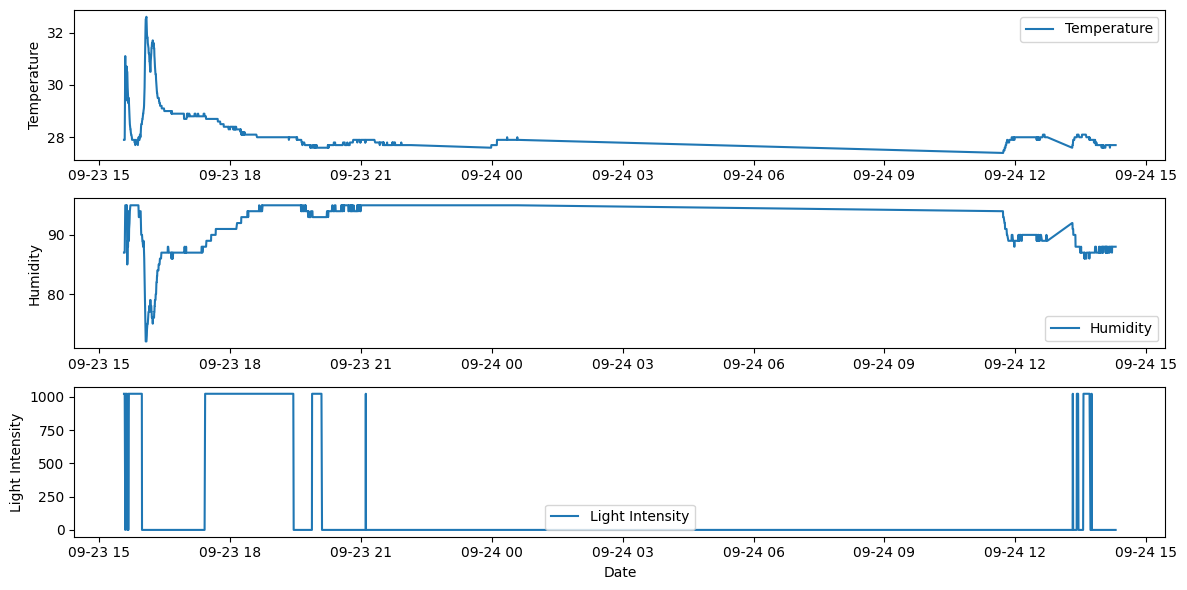

In [ ]:
#data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Line plots for time series data
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(data['created_at'], data['field1'], label='Temperature')
plt.ylabel('Temperature')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data['created_at'], data['field2'], label='Humidity')
plt.ylabel('Humidity')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data['created_at'], data['field3'], label='Light Intensity')
plt.xlabel('Date')
plt.ylabel('Light Intensity')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Calculate descriptive statistics for each feature
feature_names = ['year', 'month', 'day', 'hour', 'field2', 'field3']

# Calculate mean, median, standard deviation, min, max, and more for each feature
statistics = {
    'Feature': [],
    'Mean': [],
    'Median': [],
    'Std Deviation': [],
    'Min': [],
    'Max': [],
}

for feature in feature_names:
    statistics['Feature'].append(feature)
    statistics['Mean'].append(np.mean(X[:, feature_names.index(feature)]))
    statistics['Median'].append(np.median(X[:, feature_names.index(feature)]))
    statistics['Std Deviation'].append(np.std(X[:, feature_names.index(feature)]))
    statistics['Min'].append(np.min(X[:, feature_names.index(feature)]))
    statistics['Max'].append(np.max(X[:, feature_names.index(feature)]))

# Create a DataFrame to display the statistics
import pandas as pd

statistics_df = pd.DataFrame(statistics)
print(statistics_df)

# Calculate descriptive statistics for the target variable (field1, temperature)
target_statistics = {
    'Mean Temperature': np.mean(y),
    'Median Temperature': np.median(y),
    'Std Deviation Temperature': np.std(y),
    'Min Temperature': np.min(y),
    'Max Temperature': np.max(y),
}

print("\nTarget Variable (Temperature) Statistics:")
for stat, value in target_statistics.items():
    print(f"{stat}: {value}")


  Feature         Mean  Median  Std Deviation     Min     Max
0    year  2023.000000  2023.0       0.000000  2023.0  2023.0
1   month     9.000000     9.0       0.000000     9.0     9.0
2     day    23.281871    23.0       0.449911    23.0    24.0
3    hour    15.953235    17.0       4.999269     0.0    23.0
4  field2    91.231262    93.0       4.143913    72.0    95.0
5  field3   302.771300     0.0     466.973854     0.0  1023.0

Target Variable (Temperature) Statistics:
Mean Temperature: 28.196348494554773
Median Temperature: 28.0
Std Deviation Temperature: 0.7216826672058818
Min Temperature: 27.4
Max Temperature: 32.6


In [ ]:


# Split the data --> training 80% & testing 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.021052389604025945
R-squared: 0.9398827329097303


In [ ]:
import numpy as np
#prediction using time stamp
arr = [2023,9,28,19,95,0]
arr = np.array(arr).reshape(1, -1)
print(rf_model.predict(arr))


[27.89270489]


In [ ]:

tolerance = 1.0

# Calculate the percentage of predictions within the tolerance
within_tolerance = np.mean(np.abs(y_pred - y_test) <= tolerance) * 100

# Print the within tolerance accuracy
print(f"Accuracy within {tolerance} degrees: {within_tolerance:.2f}%")


Accuracy within 1.0 degrees: 99.36%
